<a href="https://colab.research.google.com/github/JLaura011/Business-Analytics/blob/master/Sesi%C3%B3n_6_Predicci%C3%B3n_del_stock_usando_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sesión 6: Predicción del stock**



<img src="https://www.grupolambda.com.pe/wp-content/uploads/2020/03/home-logo.png" alt="drawing" width="300"/>
<br>

 ##### Docente: Jorge Brian Alarcon Flores 

En este notebook analizaremos los datos del mercado de valores, particularmente algunas acciones tecnológicas. Aprenderemos cómo usar pandas para obtener información sobre acciones, visualizar diferentes aspectos de la misma y, finalmente, veremos algunas formas de analizar el riesgo de una acción, en función de su historial de rendimiento anterior. ¡También pronosticaremos los precios futuros de las acciones a través de un método de Memoria a corto plazo (LSTM)!

Responderemos las siguientes preguntas en el camino:

    1.) ¿Cuál fue el cambio en el precio de las acciones con el tiempo?
    2.) ¿Cuál fue el rendimiento diario de las acciones en promedio?
    3.) ¿Cuál fue el promedio móvil de las diferentes acciones?
    4.) ¿Cuál fue la correlación entre las diferentes poblaciones?
    5.) ¿Cuánto valor ponemos en riesgo al invertir en una acción en particular?
    6.) ¿Cómo podemos intentar predecir el comportamiento futuro del stock? (Predecir el precio de cierre precio de las acciones de APPLE inc usando LSTM)
    
****


En esta sección, veremos cómo manejar la solicitud de información sobre acciones con pandas y cómo analizar los atributos básicos de una acción.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

Nota rápida: el uso de globals () es una forma descuidada de configurar los nombres de DataFrame, pero es simple

Vamos a seguir y jugar con el AAPL DataFrame para tener una idea de los datos

In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-05-27,2413.580078,2330.000000,2404.989990,2410.389893,5056900.0,2410.389893,AMAZON
2020-05-28,2436.969971,2378.229980,2384.330078,2401.100098,3190200.0,2401.100098,AMAZON
2020-05-29,2442.370117,2398.199951,2415.939941,2442.370117,3529300.0,2442.370117,AMAZON
2020-06-01,2476.929932,2444.169922,2448.000000,2471.040039,2928900.0,2471.040039,AMAZON
2020-06-02,2473.530029,2445.310059,2467.000000,2472.409912,2529900.0,2472.409912,AMAZON
2020-06-03,2488.000000,2461.169922,2468.010010,2478.399902,2671000.0,2478.399902,AMAZON
2020-06-04,2507.540039,2450.010010,2477.429932,2460.600098,2948700.0,2460.600098,AMAZON
2020-06-05,2488.649902,2437.129883,2444.510010,2483.000000,3306400.0,2483.000000,AMAZON
2020-06-08,2530.000000,2487.340088,2500.199951,2524.060059,3966000.0,2524.060059,AMAZON


In [ ]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,260.571739,254.748064,257.247154,257.948023,3.349217e+07,256.550664
std,43.466691,42.291844,42.658357,43.184036,1.719639e+07,43.689275
min,193.589996,190.300003,191.550003,192.580002,1.136200e+07,190.308762
25%,218.029999,211.710007,214.839996,214.169998,2.184720e+07,212.448273
50%,263.109985,256.850006,258.690002,261.739990,2.825340e+07,260.415344
75%,300.579987,289.230011,295.059998,293.799988,3.813280e+07,293.006836
max,345.609894,332.010010,332.140015,343.989990,1.067212e+08,343.989990


In [ ]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-06-10 to 2020-06-09
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          253 non-null    float64
 1   Low           253 non-null    float64
 2   Open          253 non-null    float64
 3   Close         253 non-null    float64
 4   Volume        253 non-null    float64
 5   Adj Close     253 non-null    float64
 6   company_name  253 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


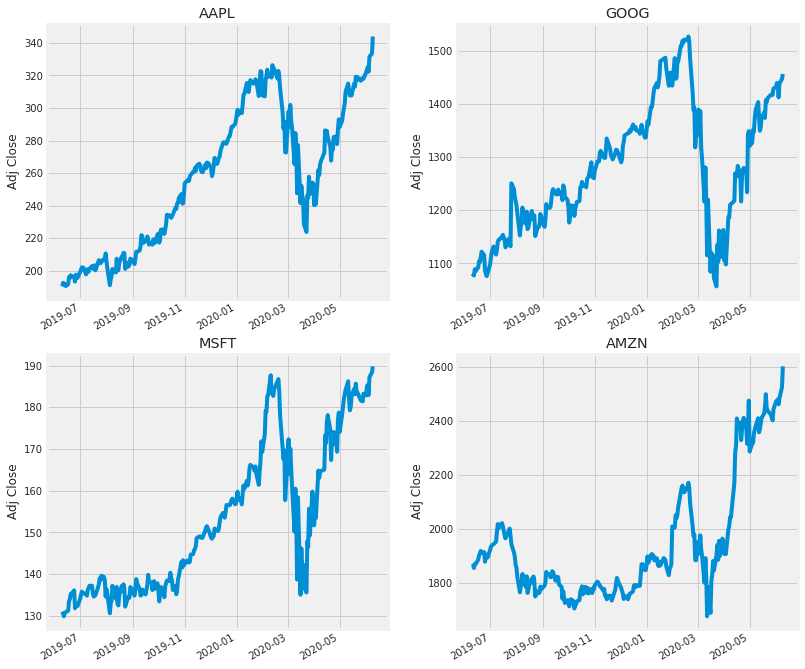

In [ ]:
# Let's see a historical view of the closing price


plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

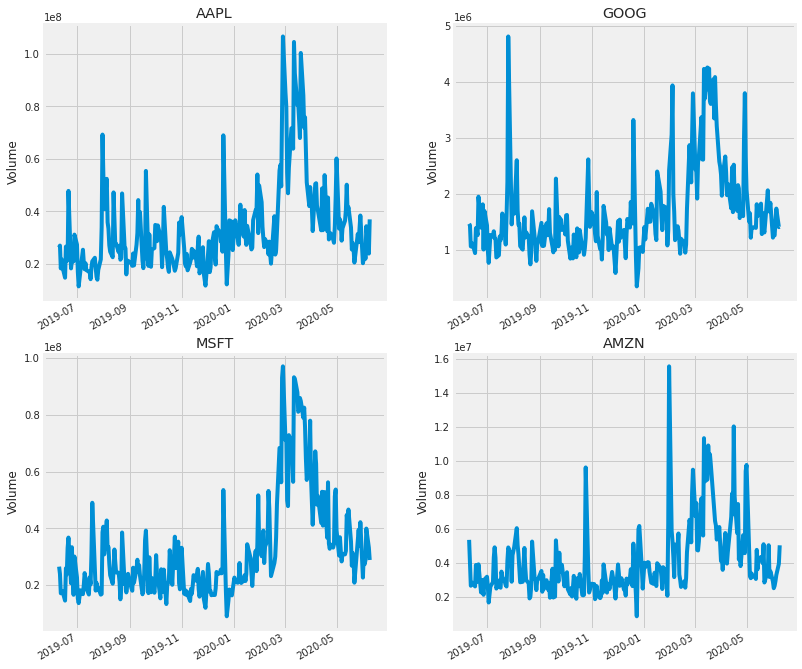

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

Ahora que hemos visto las visualizaciones para el precio de cierre y el volumen negociado cada día, sigamos adelante y calculemos el promedio móvil de la acción.

# 2. ¿Cuál fue el promedio móvil de las diferentes acciones?

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [ ]:
print(GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')



Ahora avancemos y grafiquemos todos los promedios móviles adicionales

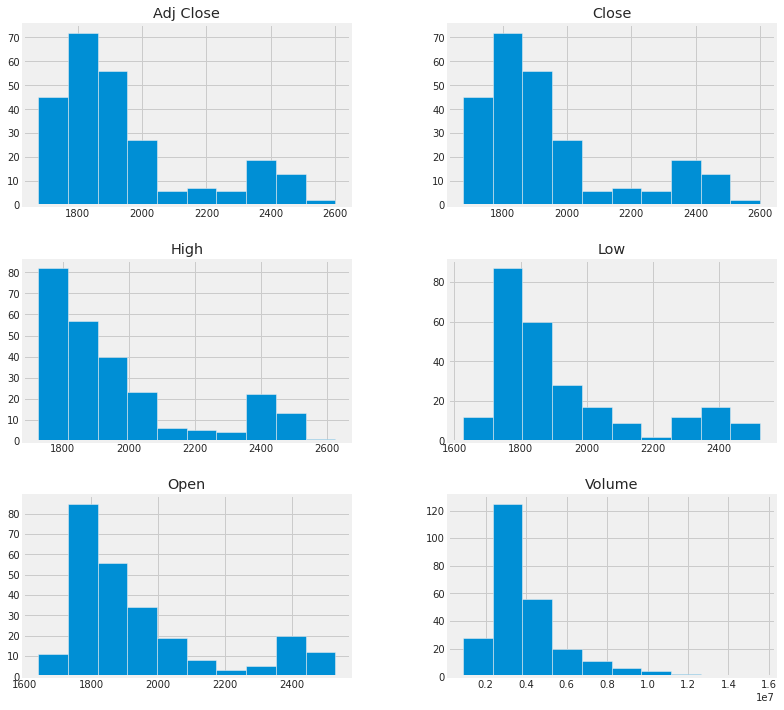

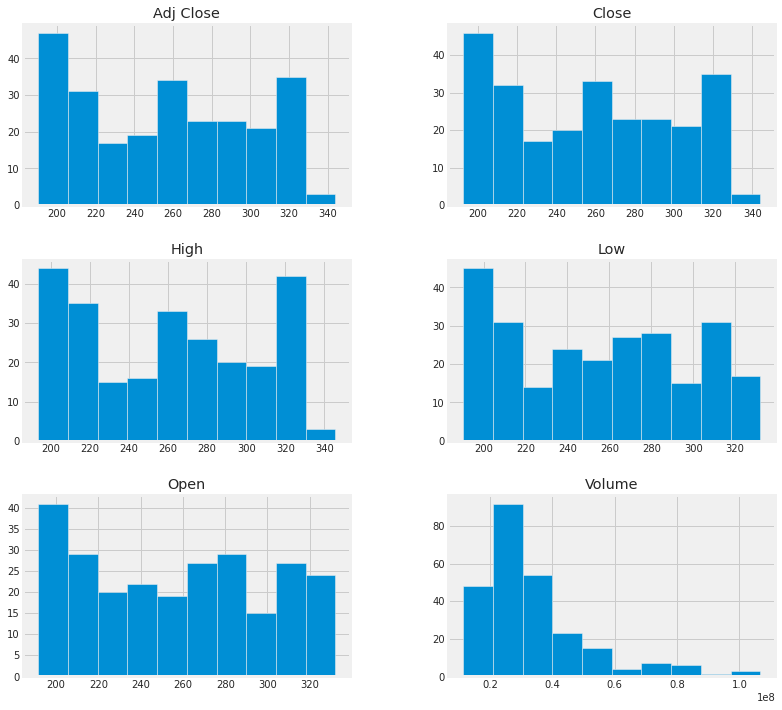

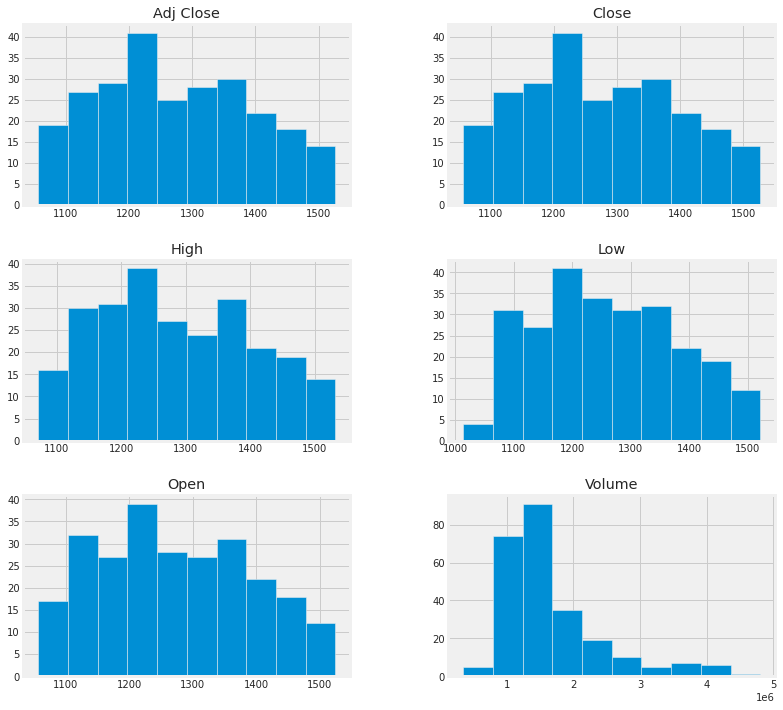

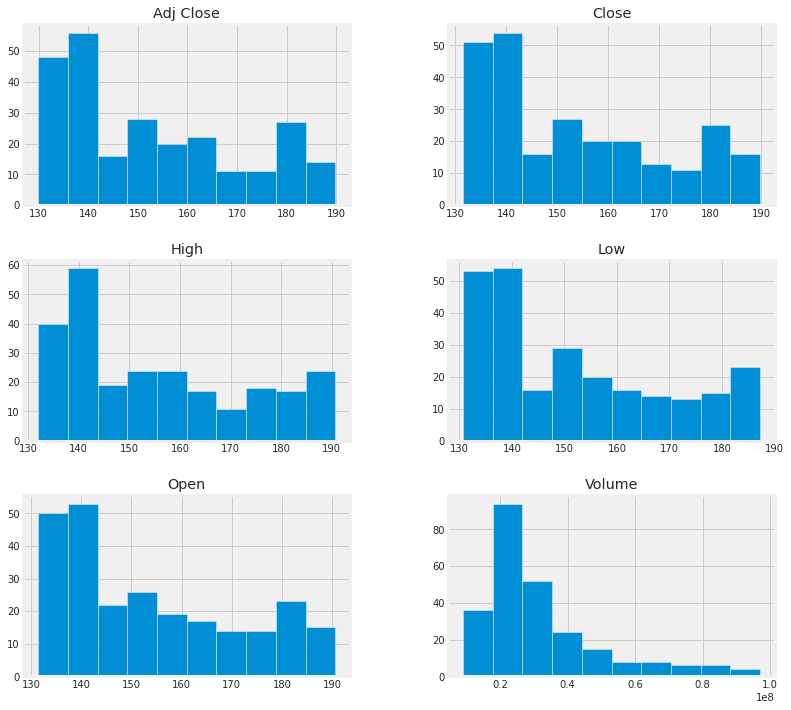

In [ ]:
df.groupby("company_name").hist(figsize=(12, 12));

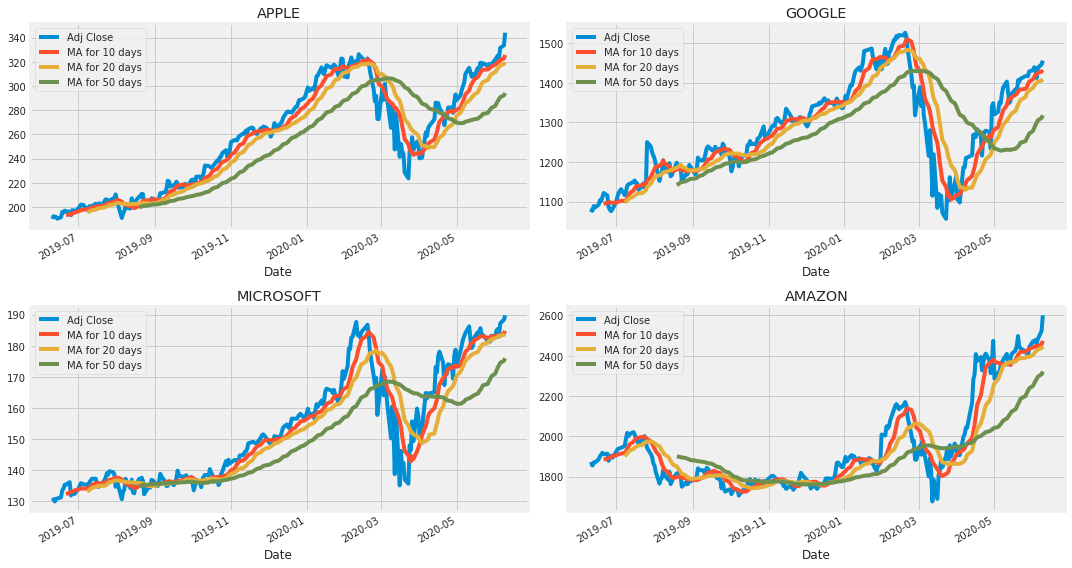

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# 3. ¿Cuál fue el rendimiento diario de las acciones en promedio?

Ahora que hemos hecho un análisis de línea de base, sigamos adelante y profundicemos un poco más. Ahora vamos a analizar el riesgo de la acción. Para hacerlo, necesitaremos observar más de cerca los cambios diarios del stock, y no solo su valor absoluto. Avancemos y usemos pandas para recuperar los retornos diarios de las acciones de Apple.

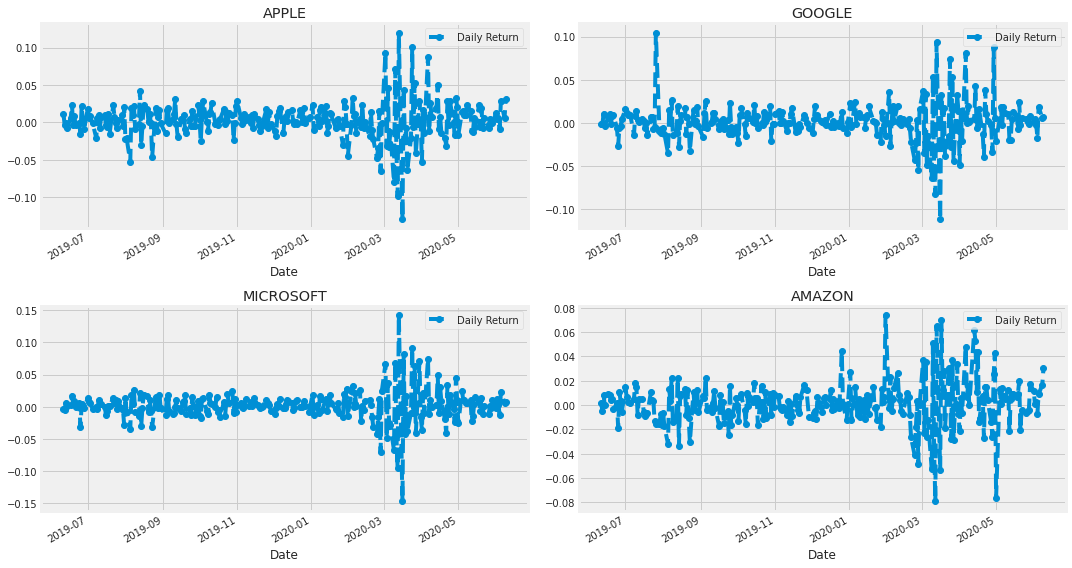

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


Genial, ahora echemos un vistazo general al rendimiento diario promedio usando un histograma. Usaremos seaborn para crear un histograma y un diagrama kde en la misma figura.

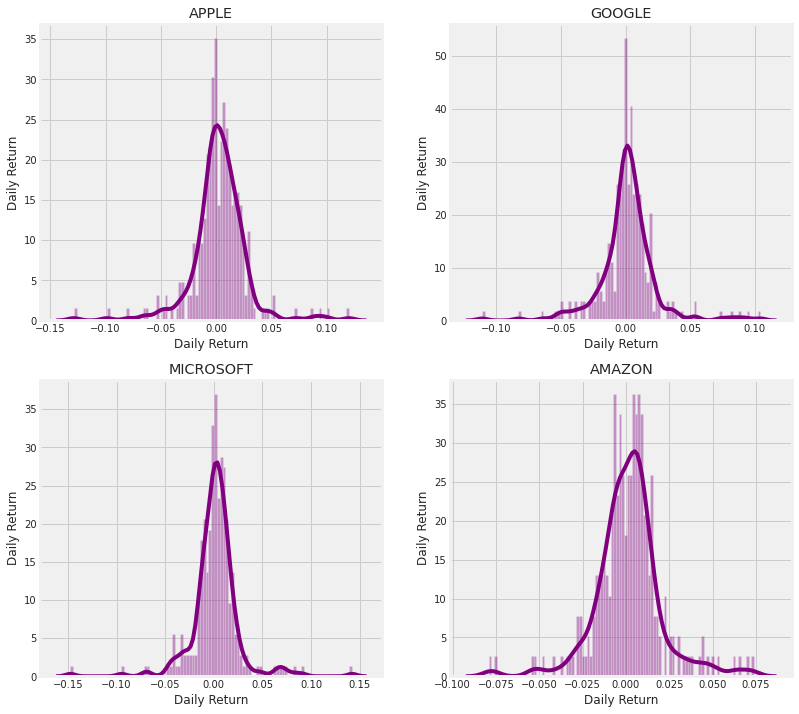

In [ ]:
# Tenga en cuenta el uso de dropna () aquí, de lo contrario los valores de NaN no pueden ser leídos por seaborn
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()


# 4. ¿Cuál fue la correlación entre diferentes precios de cierre de acciones?

¿Y si quisiéramos analizar el rendimiento de todas las acciones de nuestra lista? Avancemos y construyamos un DataFrame con todas las columnas ['Close'] para cada uno de los marcos de datos de acciones.

In [ ]:

# Obtenga todos los precios de cierre de la lista de acciones tecnológicas en un DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-06-10,190.308762,1080.380005,130.988159,1860.630005
2019-06-11,192.512451,1078.719971,130.494232,1863.699951
2019-06-12,191.899780,1077.030029,129.891647,1855.319946
2019-06-13,191.860229,1088.770020,130.711548,1870.300049
2019-06-14,190.466873,1085.349976,130.839981,1869.670044


Ahora que tenemos todos los precios de cierre, sigamos adelante y obtengamos el rendimiento diario de todas las acciones, como lo hicimos con las acciones de Apple.

In [ ]:
# Hacer que una nueva tecnología devuelva DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-06-10,NaN,NaN,NaN,NaN
2019-06-11,0.011580,-0.001537,-0.003771,0.001650
2019-06-12,-0.003183,-0.001567,-0.004618,-0.004496
2019-06-13,-0.000206,0.010900,0.006312,0.008074
2019-06-14,-0.007262,-0.003141,0.000983,-0.000337


Ahora podemos comparar el rendimiento porcentual diario de dos acciones para verificar la correlación. Primero veamos un sotck en comparación con sí mismo.

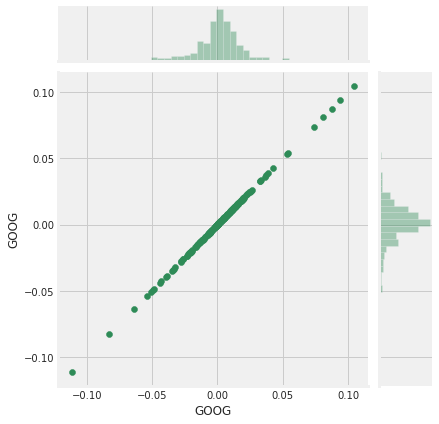

In [ ]:
# Comparar Google consigo mismo debería mostrar una relación perfectamente lineal
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

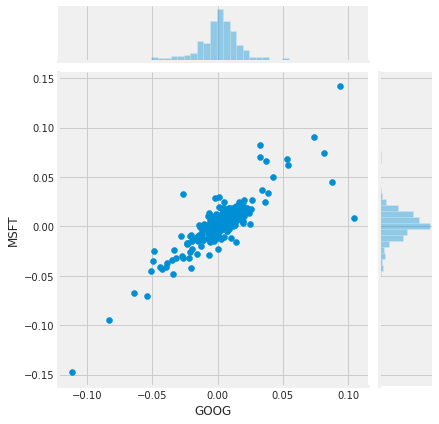

In [ ]:
# Usaremos joinplot para comparar los retornos diarios de Google y Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

Así que ahora podemos ver que si dos acciones están perfectamente correlacionadas (y positivamente) entre sí, debería producirse una relación lineal entre sus valores de rendimiento diario.


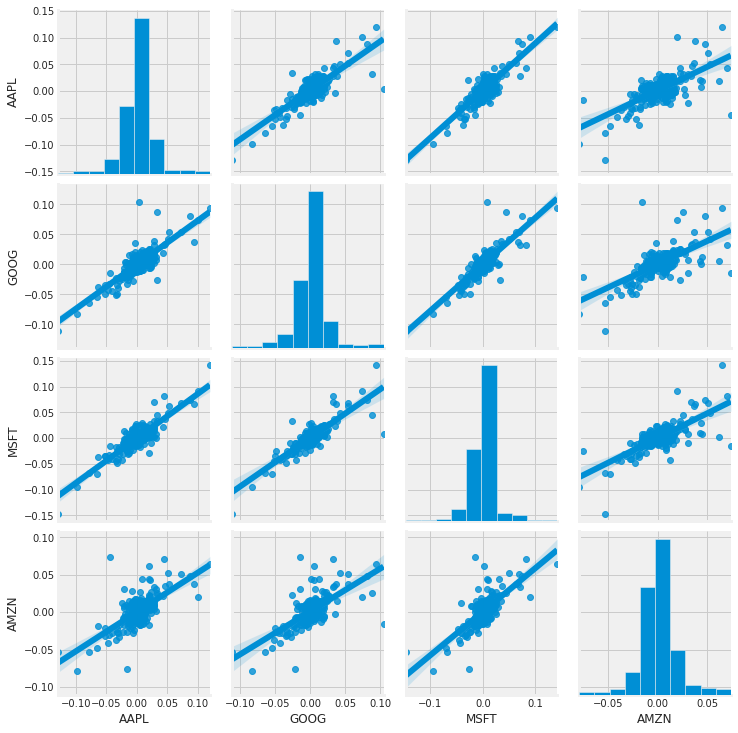

In [ ]:
# Simplemente podemos llamar a pairplot en nuestro DataFrame para un análisis visual automático
# de todas las comparaciones

sns.pairplot(tech_rets, kind='reg')

Arriba podemos ver todas las relaciones sobre los rendimientos diarios entre todas las acciones. Un vistazo rápido muestra una correlación interesante entre los retornos diarios de Google y Amazon. Puede ser interesante investigar esa comaprisión individual. Si bien la simplicidad de simplemente llamar a sns.pairplot () es fantástica, también podemos usar sns.PairGrid () para un control total de la figura, incluido qué tipo de gráficos van en diagonal, el triángulo superior y el triángulo inferior. A continuación se muestra un ejemplo de la utilización de todo el poder de seaborn para lograr este resultado.


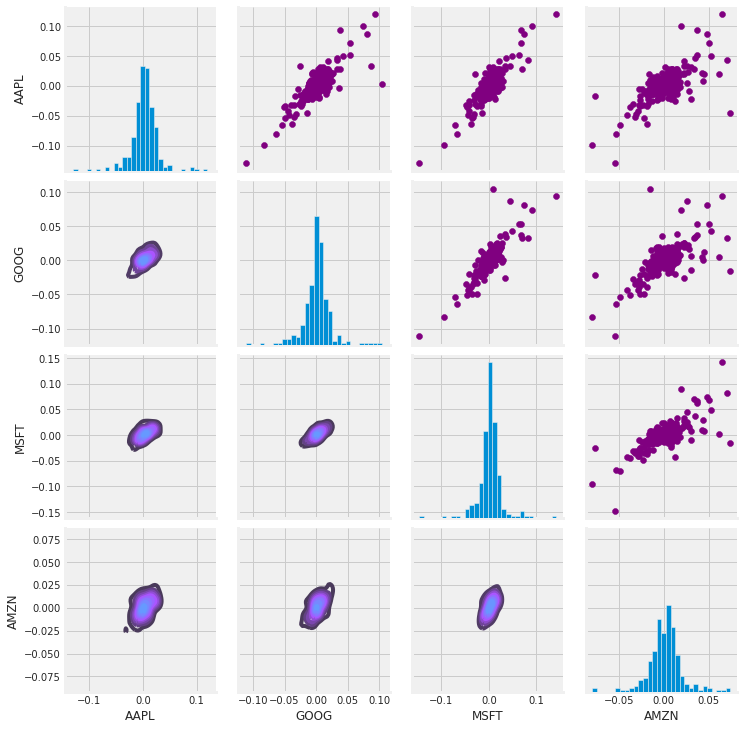

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Finalmente, también podríamos hacer un gráfico de correlación, para obtener valores numéricos reales para la correlación entre los valores de rendimiento diario de las acciones. Al comparar los precios de cierre, vemos una relación interesante entre Microsoft y Apple.

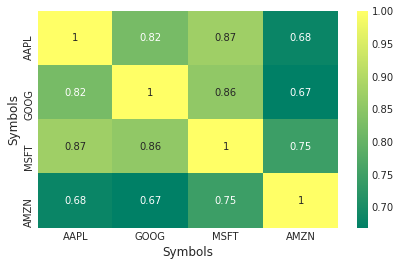

In [ ]:
# Avancemos y usemos seaborn para una gráfica de correlación rápida para los retornos diarios
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

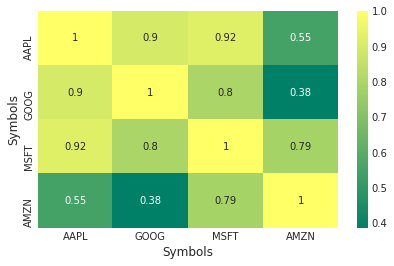

In [ ]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

# 6. Predecir el precio de cierre precio de las acciones de APPLE inc:

In [ ]:
#Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-06-03,326.200012,322.299988,324.660004,325.119995,26122800.0,325.119995
2020-06-04,325.619995,320.779999,324.390015,322.320007,21890100.0,322.320007
2020-06-05,331.750000,323.230011,323.350006,331.500000,34312600.0,331.500000


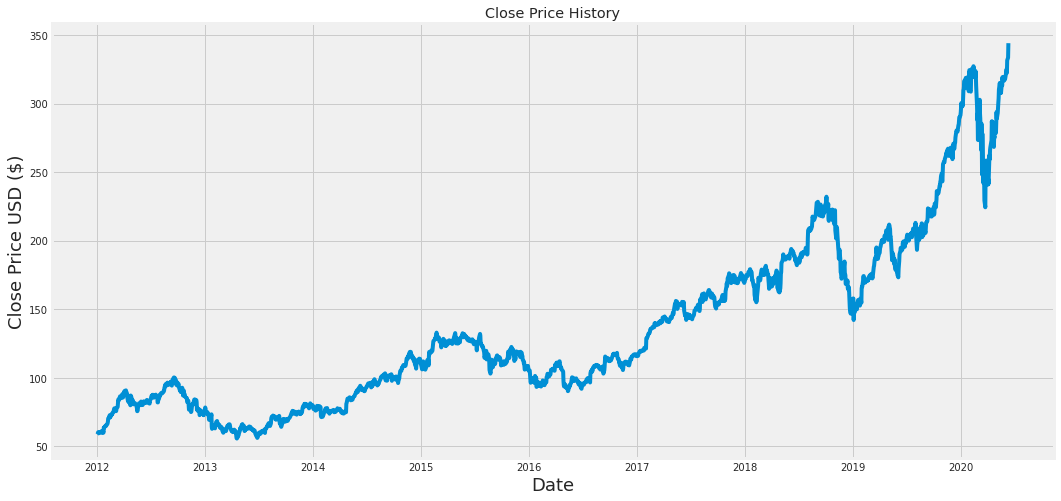

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1698

In [ ]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01026073],
       [0.0113562 ],
       [0.0136314 ],
       ...,
       [0.95666207],
       [0.96346288],
       [1.        ]])

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.01026073, 0.0113562 , 0.0136314 , 0.01579756, 0.01546545,
       0.01621393, 0.01587191, 0.01529691, 0.01451373, 0.01693764,
       0.01912363, 0.01844949, 0.01475662, 0.01828095, 0.01481114,
       0.02782294, 0.02681669, 0.02813027, 0.03097055, 0.03269058,
       0.03254683, 0.03201646, 0.03427679, 0.03640328, 0.03881234,
       0.04270349, 0.05087737, 0.05100129, 0.05555171, 0.05895211,
       0.05310795, 0.05535838, 0.05531377, 0.06162388, 0.06072667,
       0.06238722, 0.06537126, 0.06703183, 0.07181521, 0.0752999 ,
       0.07630613, 0.07665808, 0.07069992, 0.06926241, 0.06947557,
       0.07507682, 0.07665313, 0.08003865, 0.08801923, 0.09866661,
       0.09667394, 0.09667889, 0.10437692, 0.10678595, 0.10507088,
       0.10350452, 0.1018737 , 0.10729155, 0.11100923, 0.11256568])]
[0.10871914082531256]

[array([0.01026073, 0.0113562 , 0.0136314 , 0.01579756, 0.01546545,
       0.01621393, 0.01587191, 0.01529691, 0.01451373, 0.01693764,
       0.01912363, 0.01844949, 0.01

In [ ]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1638, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

Using TensorFlow backend.


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1638/1638 [==============================] - 66s 40ms/step - loss: 4.9054e-04


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

10.244719214406906

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


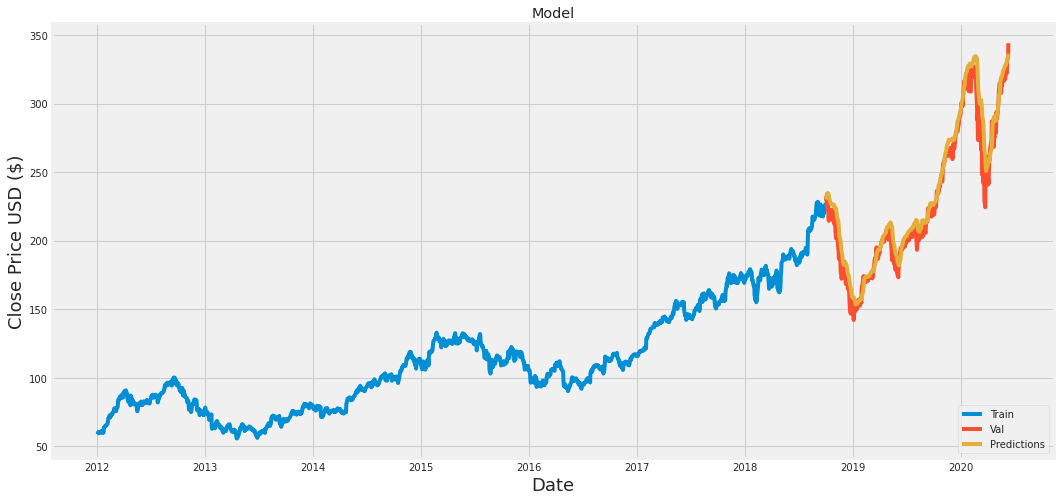

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-10-02,229.279999,230.002090
2018-10-03,232.070007,231.496872
2018-10-04,227.990005,233.271820
2018-10-05,224.289993,234.466309
2018-10-08,223.770004,234.746689
...,...,...
2020-06-03,325.119995,330.031830
2020-06-04,322.320007,331.337158
2020-06-05,331.500000,332.252167
